Noiseless Data Fitting
=============

The default heuristics for noisy models must be modified for noiseless data. Those heuristics primarly check for relative changes to the average residuals. For noiseless data the residuals can be at numeric precision and so the checks should be done using exact thresholds rather than relative thresholds.

Also for exact fits the nyquist frequency must be chosen well. Exact models from the s domain will have slightly modified phase response when run at a finite nyquist frequency. The fits will choose higher order to fit out this modified phase. If the nyquist is sufficiently high and some fit error is allowed, then the order will be reduced.

 - *The order reduction for this is not working well (it worked better in the past). Needs some attention.*

In [1]:
from wield.iirrational.utilities.mpl import *

/home/mcculler/.local/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


(direct = 4.379e+01, Psvd= 4.379e+01, Zsvd= 4.379e+01)
LINEAR Final Residuals:  0.003905684042473498
(direct = 4.079e+01, Psvd= 4.079e+01, Zsvd= 4.079e+01)
LINEAR Final Residuals:  21461.937977934154
Using last (direct)! 20
Cleared  pole (-1.0000000000000056+0j)
Cleared  pole (-0.9337219070053355+0j)
Cleared  zero (-2.022799388440665+0j)
Cleared  zero (-0.9999999999999999+0j)
Initial Order: (Z= 18, P= 18, Z-P= 0)
TRIPLETS (rat = 1.0096714011831398, pre = 2.9715222030734957e-08, mid = 2.9695964754453158e-08, post = 2.9659722894360767e-08
N:  2
[(0.9937908350719397+0.0011628065503476077j), (0.9937908350719397-0.0011628065503476077j)] zeros
[(0.9917854823999889+0.005584742537756558j), (0.9917854823999889-0.005584742537756558j)] zeros
[(0.9810664341215537+0.012280189950038723j), (0.9810664341215537-0.012280189950038723j)] zeros
[(0.871123415773924+0.01670562965952297j), (0.871123415773924-0.01670562965952297j)] zeros
[(0.9922880282193801+0.004460262849743871j), (0.9922880282193801-0.004460

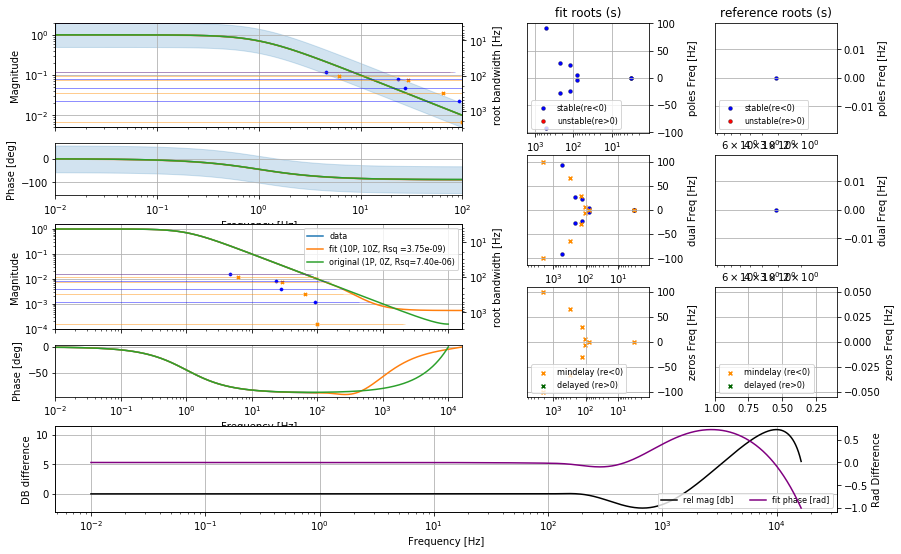

In [19]:
#tdat =  iirrational_data('rand2_log100E', set_num = 1)
tdat =  iirrational_data('simple0E', set_num = 3)
out = v1.data2filter(
    tdat,
    SNR = 1,
    F_nyquist_Hz = 16384, 
)
ax = plot_fitter_flag_compare(out.fitter, tdat.fitter)

(direct = 4.379e+01, Psvd= 4.379e+01, Zsvd= 4.379e+01)
LINEAR Final Residuals:  0.003905684042473498
(direct = 4.079e+01, Psvd= 4.079e+01, Zsvd= 4.079e+01)
LINEAR Final Residuals:  21461.937977934154
Using last (direct)! 20
Cleared  pole (-1.0000000000000056+0j)
Cleared  pole (-0.9337219070053355+0j)
Cleared  zero (-2.022799388440665+0j)
Cleared  zero (-0.9999999999999999+0j)
Initial Order: (Z= 18, P= 18, Z-P= 0)
TRIPLETS (rat = 1.0096714011831398, pre = 2.9715222030734957e-08, mid = 2.9695964754453158e-08, post = 2.9659722894360767e-08
N:  2
[(0.9937908350719397+0.0011628065503476077j), (0.9937908350719397-0.0011628065503476077j)] zeros
[(0.9917854823999889+0.005584742537756558j), (0.9917854823999889-0.005584742537756558j)] zeros
[(0.9810664341215537+0.012280189950038723j), (0.9810664341215537-0.012280189950038723j)] zeros
[(0.871123415773924+0.01670562965952297j), (0.871123415773924-0.01670562965952297j)] zeros
[(0.9922880282193801+0.004460262849743871j), (0.9922880282193801-0.004460

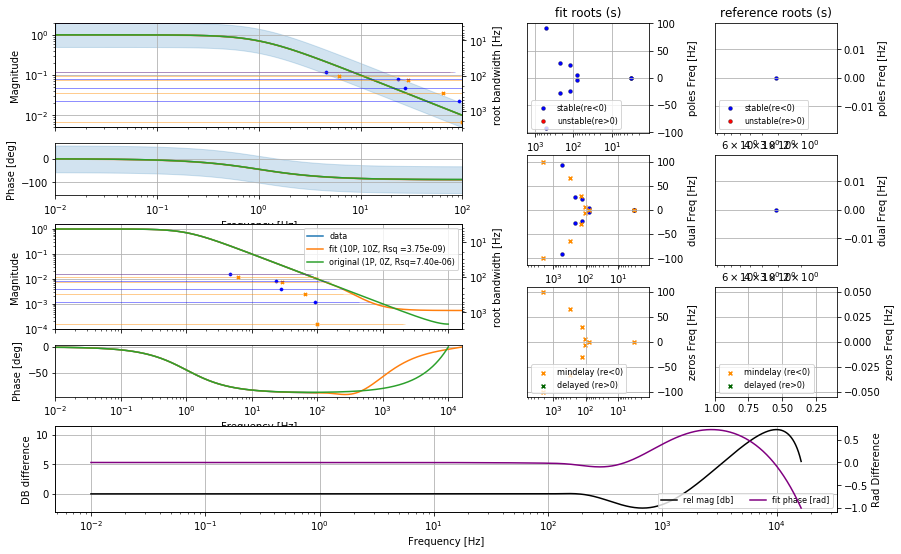

In [20]:
out = v1.data2filter(
    tdat,
    SNR = 1,
    F_nyquist_Hz = 16384, 
    hints = [
        v1.hintsets.exact_data,
    ],
)
ax = plot_fitter_flag_compare(out.fitter, tdat.fitter)

 - Inspect the hintsets to get an idea how to run for different applications. The "hints" argument to data2filter can take a list of sets which it will overlay.

In [23]:
v1.hintsets.exact_data

{'resavg_EthreshOrdDn': 0.01,
 'resavg_RthreshOrdC': None,
 'resavg_RthreshOrdDn': None,
 'resavg_RthreshOrdUp': None}

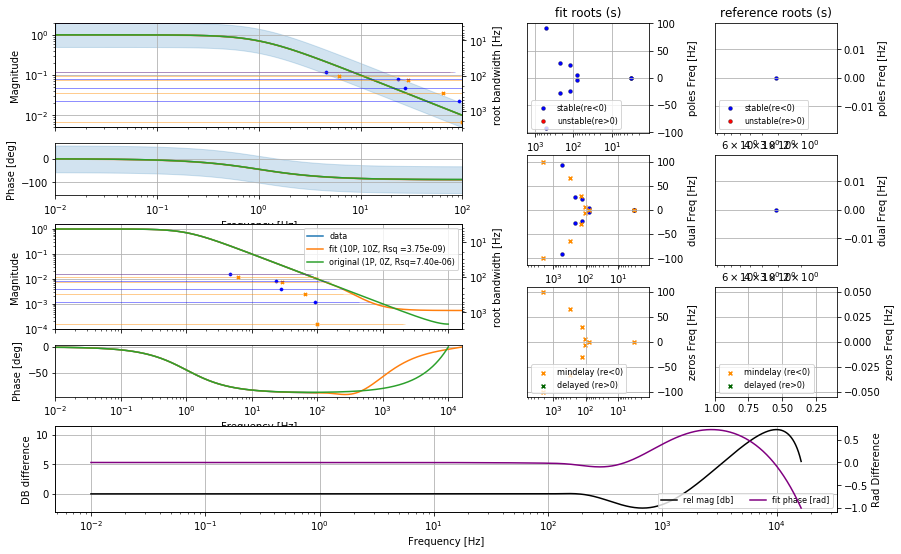

In [25]:
out = v1.data2filter(
    tdat,
    SNR = 1,
    F_nyquist_Hz = 16384, 
    hints = [
        {'resavg_EthreshOrdDn': 1,
         'resavg_RthreshOrdC': None,
         'resavg_RthreshOrdDn': None,
         'resavg_RthreshOrdUp': None},
        v1.hintsets.quiet,
    ]
)
ax = plot_fitter_flag_compare(out.fitter, tdat.fitter)